In [1]:
# load stuff:
import scipy.optimize as so
import datetime as dt

from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *

In [2]:
#load Datasets
#SETNAME="MERRA"
#SETNAME="MERRA2"
SETNAME="JRA-55"

#Global Params
if SETNAME=="MERRA":
    FILES="../Data/Merra_inst3_3d_asm_Cp_1979-2016/instM_3d_asm_Cp_197901_201601.nc"
    RESLOC = '../Results/'
    RESLOC_SPECIFIC = 'MERRA_RH/'
    DATALOC_SPECIFIC = 'Merra_inst3_3d_asm_Cp_1979-2016/'
    DATALOC = '../Data/' + DATALOC_SPECIFIC
elif SETNAME=="MERRA2":
    FILES="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_PS,RH,T/MERRA2_*"
    RESLOC = '../NicePlots/'#'../Results/'
    RESLOC_SPECIFIC = 'MERRA2_RH/'
    DATALOC_SPECIFIC = 'MERRA2_instM_3d_asm_Np_PS,RH,T/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC
elif SETNAME=="JRA-55":
    FILES="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_*/anl*"
    RESLOC = '../NicePlots/'#'../Results/'#'../NicePlots/'
    RESLOC_SPECIFIC = 'JRA-55_RH/'
    DATALOC_SPECIFIC = 'JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/'
    DATALOC = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC
else:
    raise Exception("Sorry, notexisting Setname")
#What parts of the Notebook should run?
TOPOANALYSIS=True

MASKELEVATION=True
SURFACEVALUES=True

GLOBALRHDIST=True
GLOBALRHDISTCOMPARE=False

VERTICALPROFILES=False
VERTICALPROFILESCOMPARE=False

RHCHANGEOVERTCHANGE_HORIZONTAL=True
RHCHANGEOVERTCHANGE_VERTICAL=True
TvsRHANALYSIS=True

TONYAXISPLOT=False
TONYAXISPLOT2=False
TONYAXISPLOTCOMPARE=False

TEMPTRENDANALYSIS=False

#Times for analysis
t1_start='1958-01-01'
t1_end='1973-12-01'
t2_start='2007-01-01'
t2_end='2021-12-01'

if SETNAME=="MERRA2":
    t1_start='1980-01-01'
    t1_end='1989-12-01'
    t2_start='2010-01-01'
    t2_end='2022-12-01'

In [3]:
DS = Dataset(files=FILES, setname = SETNAME, dataloc = DATALOC)

Loading full dataset JRA-55
[########################################] | 100% Completed | 31.29 s
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288, lat: 145, p: 37)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * p        (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Data variables:
    RH       (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
    T        (time, p, lat, lon) float32 dask.array<chunksize=(12, 37, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Jul 21 10:47:43 2023: cdo -f nc --eccodes copy ../raw/a...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...


In [4]:
if MASKELEVATION==True and SETNAME=="JRA-55":
    DS_2D = Dataset(files='../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface_1958-2021/anl*pres*.nc', setname = 'JRA-55_2D', dataloc = '../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_surface/')
    DS.ds = elevation2nan( DS.ds, DS_2D.ds )
    print(DS.ds)

Loading full dataset JRA-55_2D
[########################################] | 100% Completed | 5.92 ss
<xarray.Dataset>
Dimensions:  (time: 768, lon: 288, lat: 145)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    SP       (time, lat, lon) float32 dask.array<chunksize=(12, 145, 288), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Jul 21 13:39:16 2023: cdo -f nc --eccodes copy anl_surf...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...
<xarray.Dataset>
Dimensions:  (time: 768, p: 37, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2

In [5]:
if SURFACEVALUES==True:
    DS.init_surfacevals()

Load existing file for Surfacevals from ../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_1958-2021/surfacevals.netcdf
<xarray.Dataset>
Dimensions:  (time: 768, lat: 145, lon: 288)
Coordinates:
  * time     (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Data variables:
    RH       (time, lat, lon) float32 dask.array<chunksize=(768, 145, 288), meta=np.ndarray>
    T        (time, lat, lon) float32 dask.array<chunksize=(768, 145, 288), meta=np.ndarray>


In [6]:
# =======================================================================
#Initilize topography analysis
if TOPOANALYSIS==True:
    TOPO = Dataset(files="../../../../../../work/mh0066/m301053/Data/Topo/topo_r720x360.nc", setname = 'TOPO', dataloc = '../../../../../../work/mh0066/m301053/Data/Topo/')
    TOPO.land_mask = xr.where(TOPO.ds.topo >= 0.0, True, False)
    
    # Reindex the land mask to match the climate data grid
    TOPO.land_mask_reindexed = TOPO.land_mask.reindex_like(DS.ds, method='nearest')
    print(TOPO.land_mask_reindexed)
    #TOPO.ds.where(TOPO.land_mask_reindexed==False).topo.plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_elevation,cbar_kwargs= cbar_kwargs) for ocean


Loading full dataset TOPO
[########################################] | 100% Completed | 121.28 ms
<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
Data variables:
    topo     (lat, lon) float32 dask.array<chunksize=(360, 720), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri May 05 16:46:47 2023: cdo -f nc topo,r720x360 topo_r720...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...
<xarray.DataArray 'topo' (lat: 145, lon: 288)>
dask.array<getitem, shape=(145, 288), dtype=bool, chunksize=(145, 288), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.7

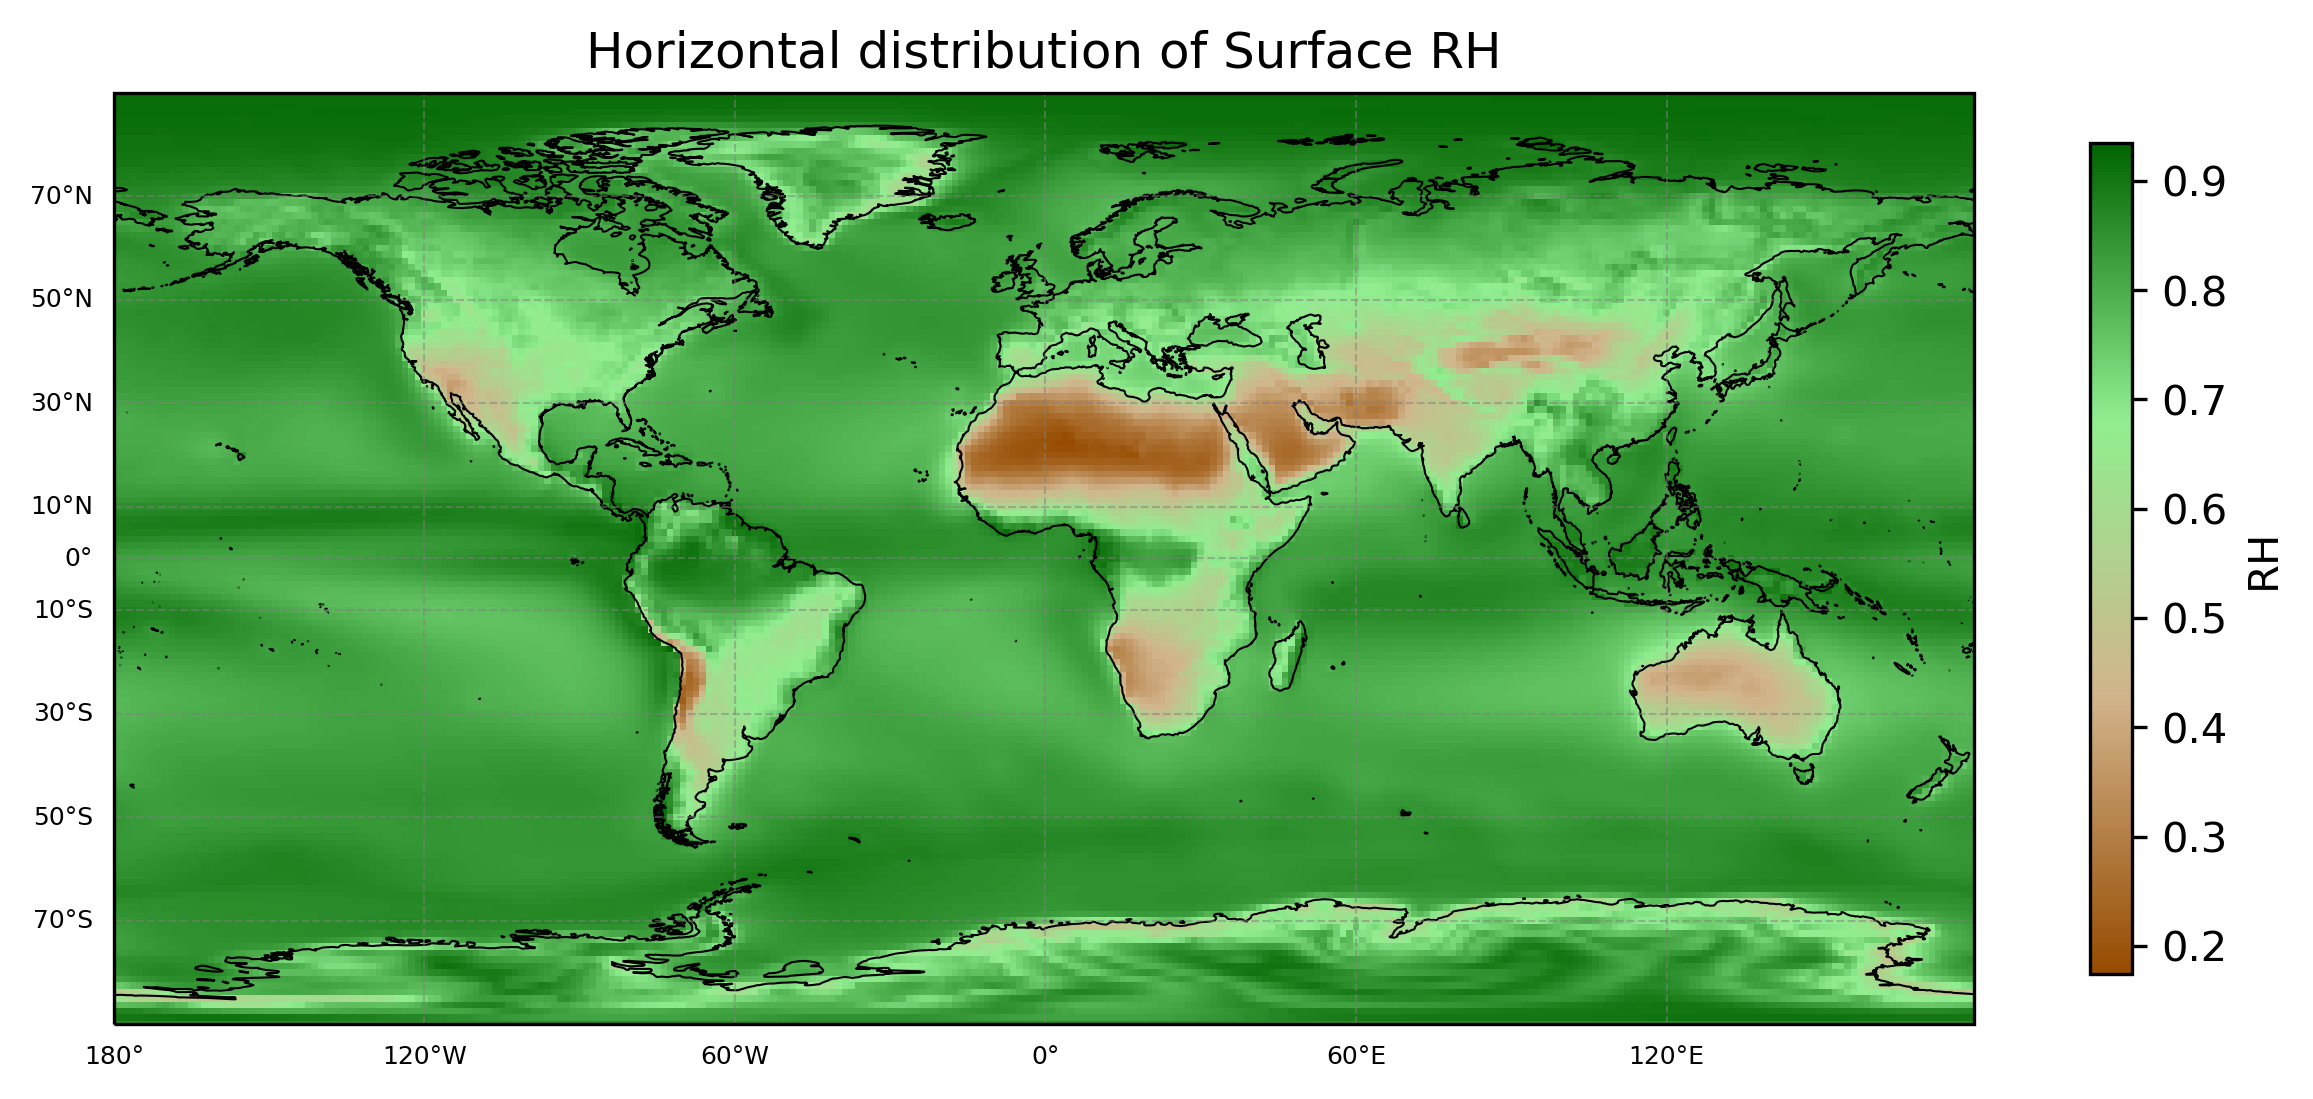

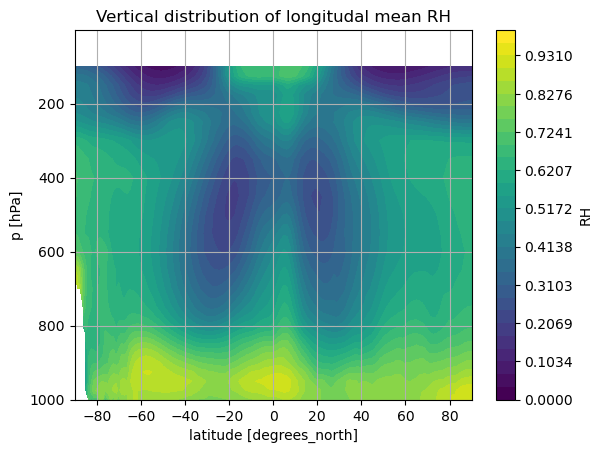

In [7]:
# =======================================================================
#RH overview
if GLOBALRHDIST==True:

    # Plot T @ Sealevel and mean over timerange and Lat zone
    fig, ax, gl, cbar_kwargs = create_empty_2d_map()
    t1=t1_start
    t2=t2_end
    
    l1=-90
    l2=90
    
    if SURFACEVALUES==True:
        time_mean(get_timeframe(get_lat_zone(DS.ds_surface.RH,l1,l2),t1,t2)).plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_RH,cbar_kwargs= cbar_kwargs)
    else:
        time_mean(get_timeframe(get_lat_zone(get_sea_level(DS.ds.RH),l1,l2),t1,t2)).plot(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',cmap=cmap_RH,cbar_kwargs= cbar_kwargs)
        
    
    ax.set_title('Horizontal distribution of Surface RH')
    plt.show()
    
    # Vertical RH Plot with contours
    
    fig = plt.figure()
    time_mean(get_timeframe(lon_mean(DS.ds.RH),t1,t2)).plot.contourf(yincrease=False,vmin=0, vmax=1, levels=30, x='lat',y='p')
    plt.title('Vertical distribution of longitudal mean RH')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'global_RH_Distribution_vertical.png',dpi=400)
    plt.grid()
    plt.show()
    

In [8]:
# =======================================================================
# Compare RH in different time periods:
if GLOBALRHDISTCOMPARE==True:
    T1 = lon_mean(time_mean( DS.ds.RH.sel(time=slice(t1_start,t1_end)) ))
    T2 = lon_mean(time_mean( DS.ds.RH.sel(time=slice(t2_start,t2_end)) ))

    T_diff=(T2-T1)
    
    T_diff.plot.contourf(yincrease=False,vmin=-0.05, vmax=0.05, levels=20, cmap=cmap_RH_change)
    plt.title('Change in RH comparing \n ' +t1_start+ ' to ' + t1_end + ' and period '+ t2_start+ ' to ' + t2_end)
    plt.grid()
    fig.tight_layout()
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'absolute_RH_change_2.png',dpi=400)
    
    plt.show()

In [9]:
# =======================================================================
#RH vertical profiles in zones in mean over timeframe

if VERTICALPROFILES==True:
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()

    for i in range(0,int(0.5*len(zones))):
        l1 = zones[2*i]
        l2 = zones[2*i+1]
        print(l1,l2)
        #time_mean(lat_mean(get_timeframe(get_lat_zone(lon_mean(DS.ds).RH,l1,l2),t1,t2))).plot.line(y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'° ,weighted mean')
        #time_mean(lat_mean(lon_mean(get_timeframe(get_lat_zone(DS.ds.RH,l1,l2),t1,t2)))).plot.line(y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'° ,weighted mean')
        
        profile = DS.ds.RH.sel(lat=slice(l1,l2), time=slice(t1,t2)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("time", "lat", "lon"))
        profile.plot.line(y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'° ,weighted mean')
    
    ax.set_ylim(top=TOP_LIM4PLOT)
    ax.set_yscale('log')
    ax.set_title('Zoanl mean RH in different heights p')
    ax.legend(title = 'Latitude zones:')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles.png',dpi=400)
    plt.show()



In [10]:
# =======================================================================
#RH vertical profiles in zones in mean over timeframe

if VERTICALPROFILESCOMPARE==True:
    zones=ZONES_Helene
    
    fig, ax = plt.subplots()

    for i in range(0,int(0.5*len(zones))):
        l1 = zones[2*i]
        l2 = zones[2*i+1]
        print(l1,l2)
        profile1 = DS.ds.RH.sel(lat=slice(l1,l2), time=slice(t1_start,t1_end)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("time", "lat", "lon"))
        profile2 = DS.ds.RH.sel(lat=slice(l1,l2), time=slice(t2_start,t2_end)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("time", "lat", "lon")) 
        (profile2-profile1).plot.line(y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'° ,weighted mean')
    
        #RH_diff =time_mean(get_timeframe(lat_mean(get_lat_zone(lon_mean(DS.ds).RH,l1,l2)),t2_start,t2_end))-time_mean(get_timeframe(lat_mean(get_lat_zone(lon_mean(DS.ds).RH,l1,l2)),t1_start,t1_end))
        #RH_diff.plot.line(y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'°')
    
    ax.set_ylim(top=TOP_LIM4PLOT)
    ax.set_yscale('log')
    ax.set_title('Zoanl mean RH in different heights p comparing \n ' +t1_start+ ' to ' + t1_end + ' and period '+ t2_start+ ' to ' + t2_end)
    ax.legend(title = 'Latitude zones:')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_chnage.png',dpi=400)
    plt.show()

In [11]:


from datetime import datetime

# Calculate the mean datetime for the first period
t1_start_date = datetime.strptime(t1_start, '%Y-%m-%d')
t1_end_date = datetime.strptime(t1_end, '%Y-%m-%d')
t1_mean_date = t1_start_date + (t1_end_date - t1_start_date) / 2

# Calculate the mean datetime for the second period
t2_start_date = datetime.strptime(t2_start, '%Y-%m-%d')
t2_end_date = datetime.strptime(t2_end, '%Y-%m-%d')
t2_mean_date = t2_start_date + (t2_end_date - t2_start_date) / 2

# Calculate the distance in years between the mean dates
DT = t2_mean_date.year - t1_mean_date.year 
print('Total analysed time period: ' +str(DT)+' years')



Total analysed time period: 49 years


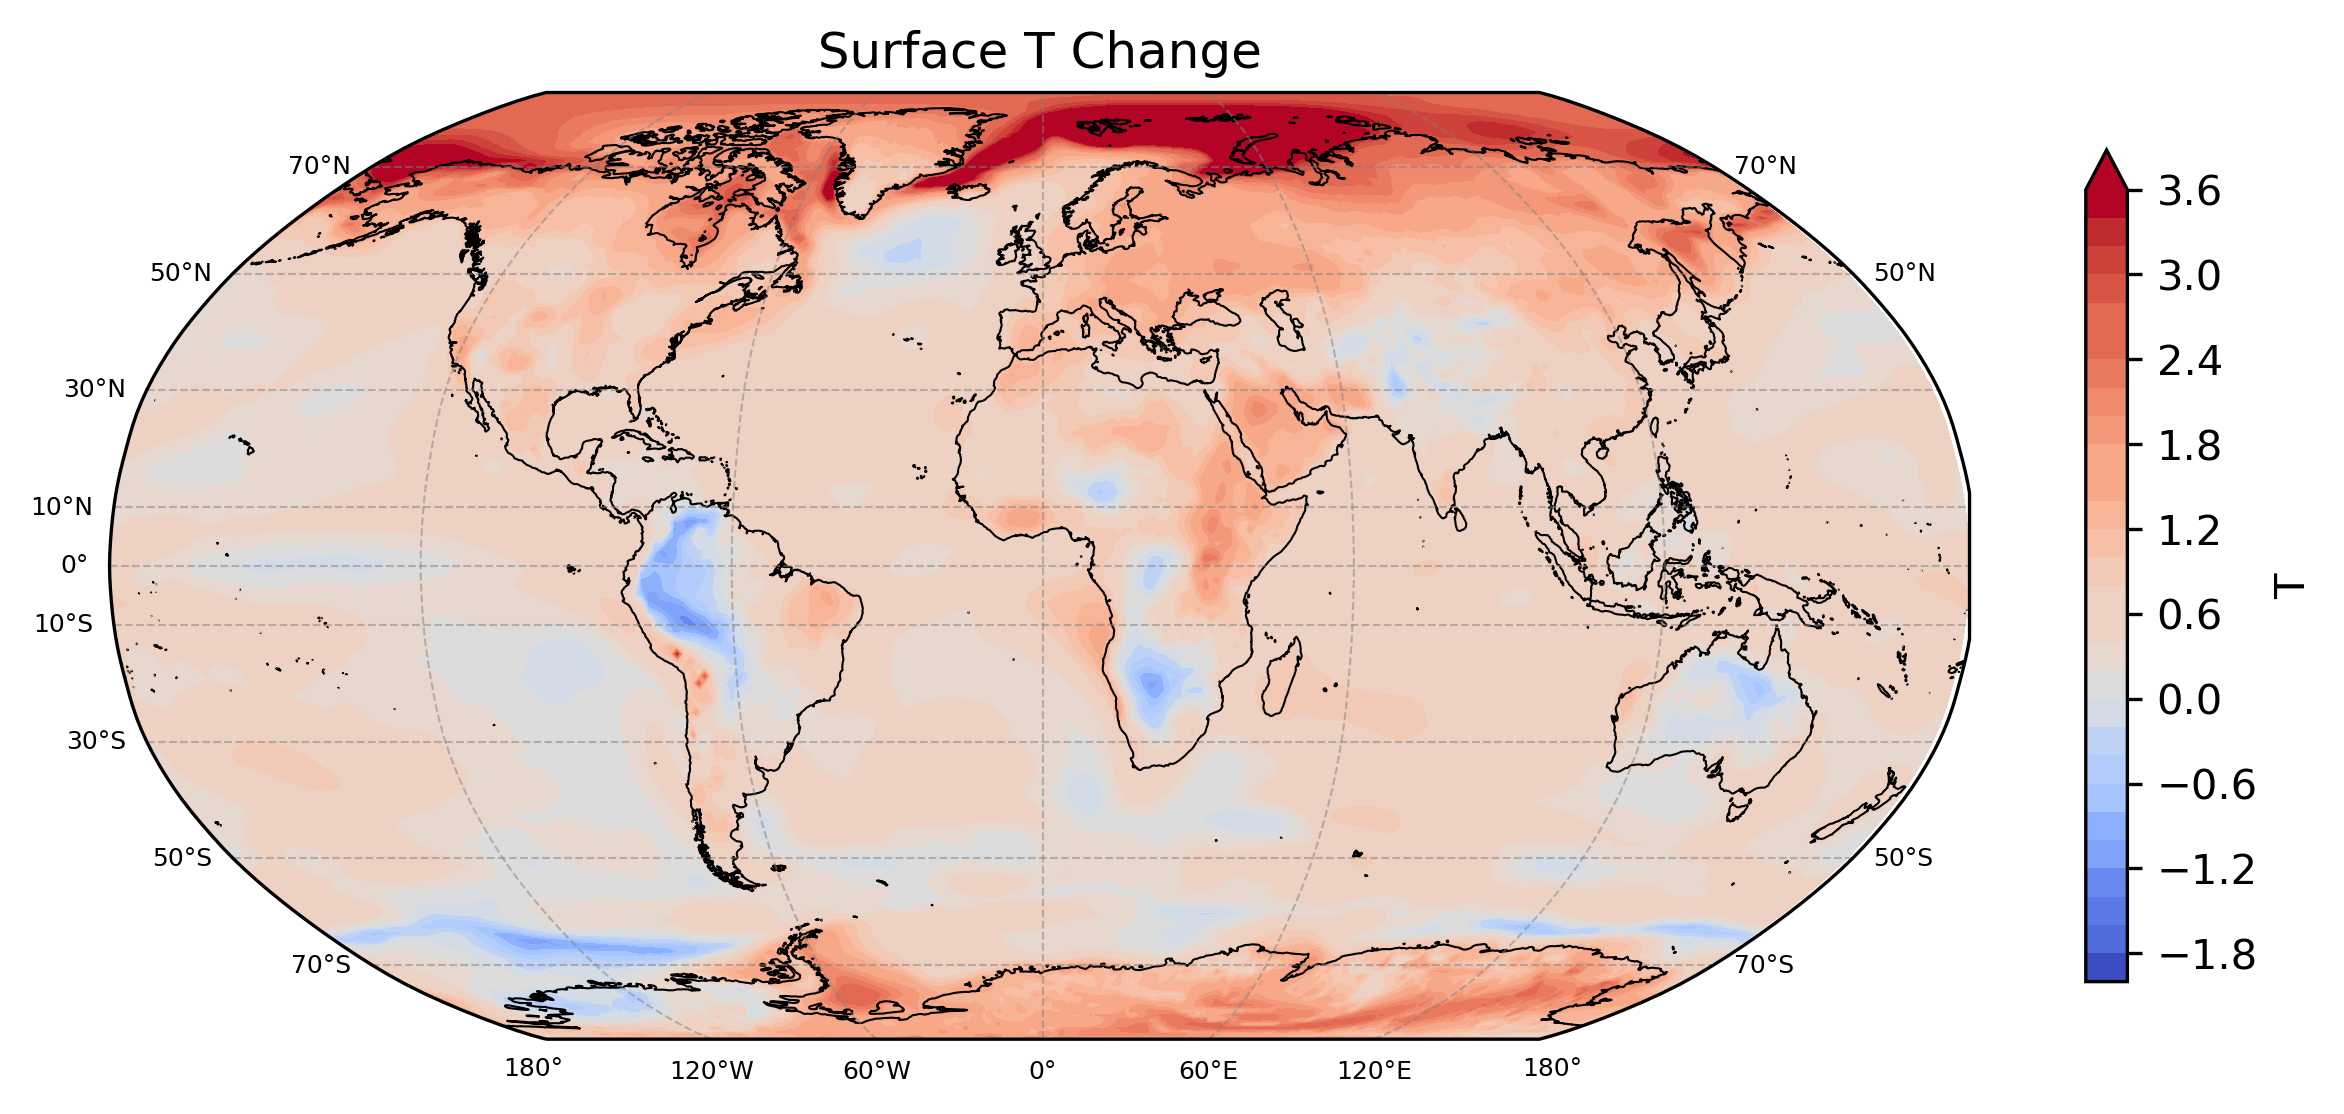

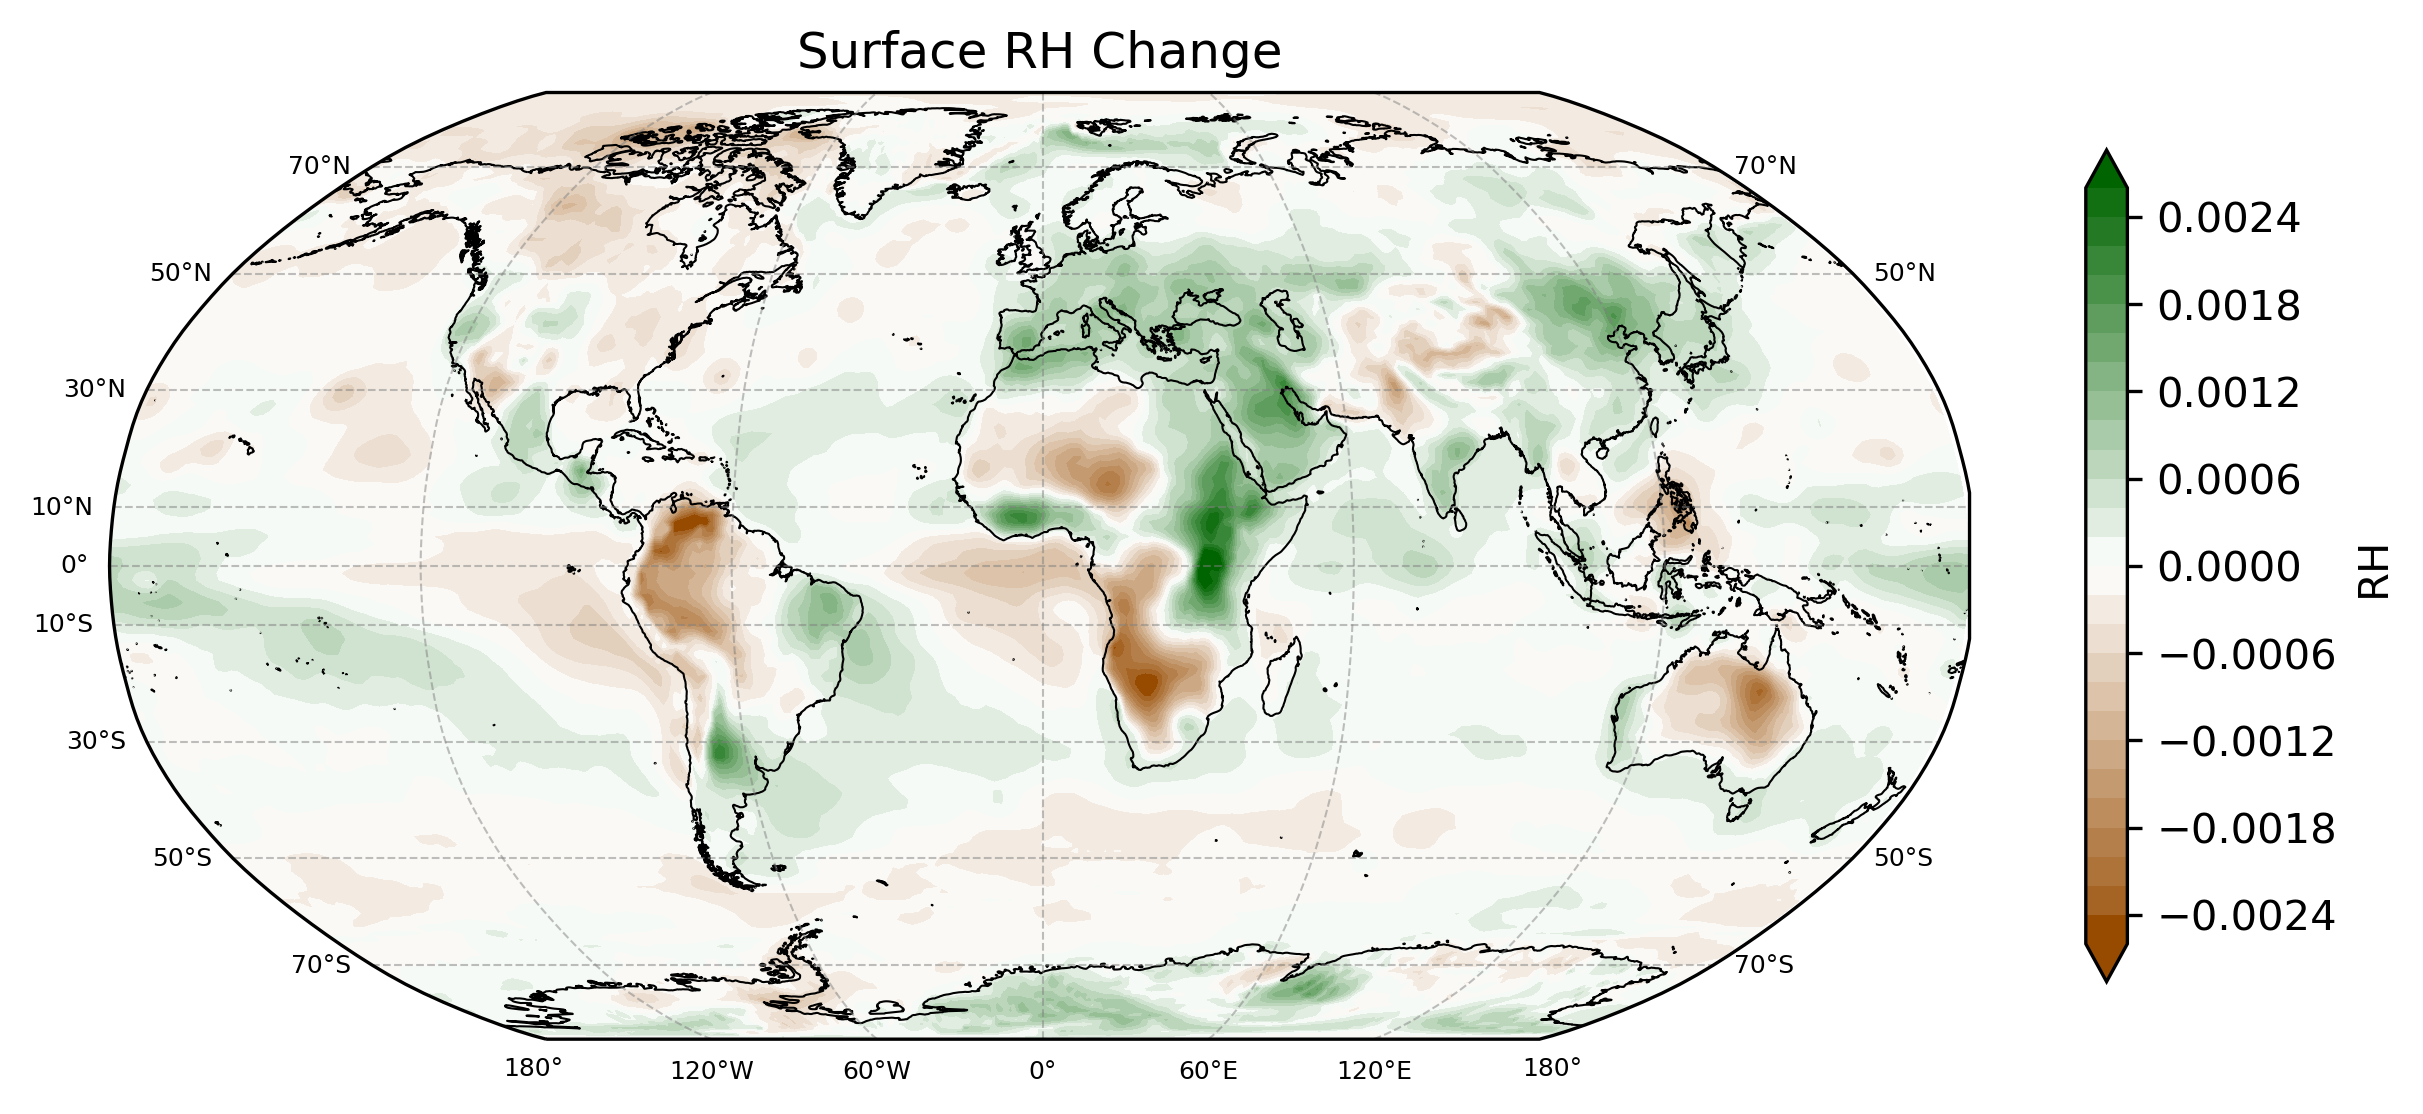

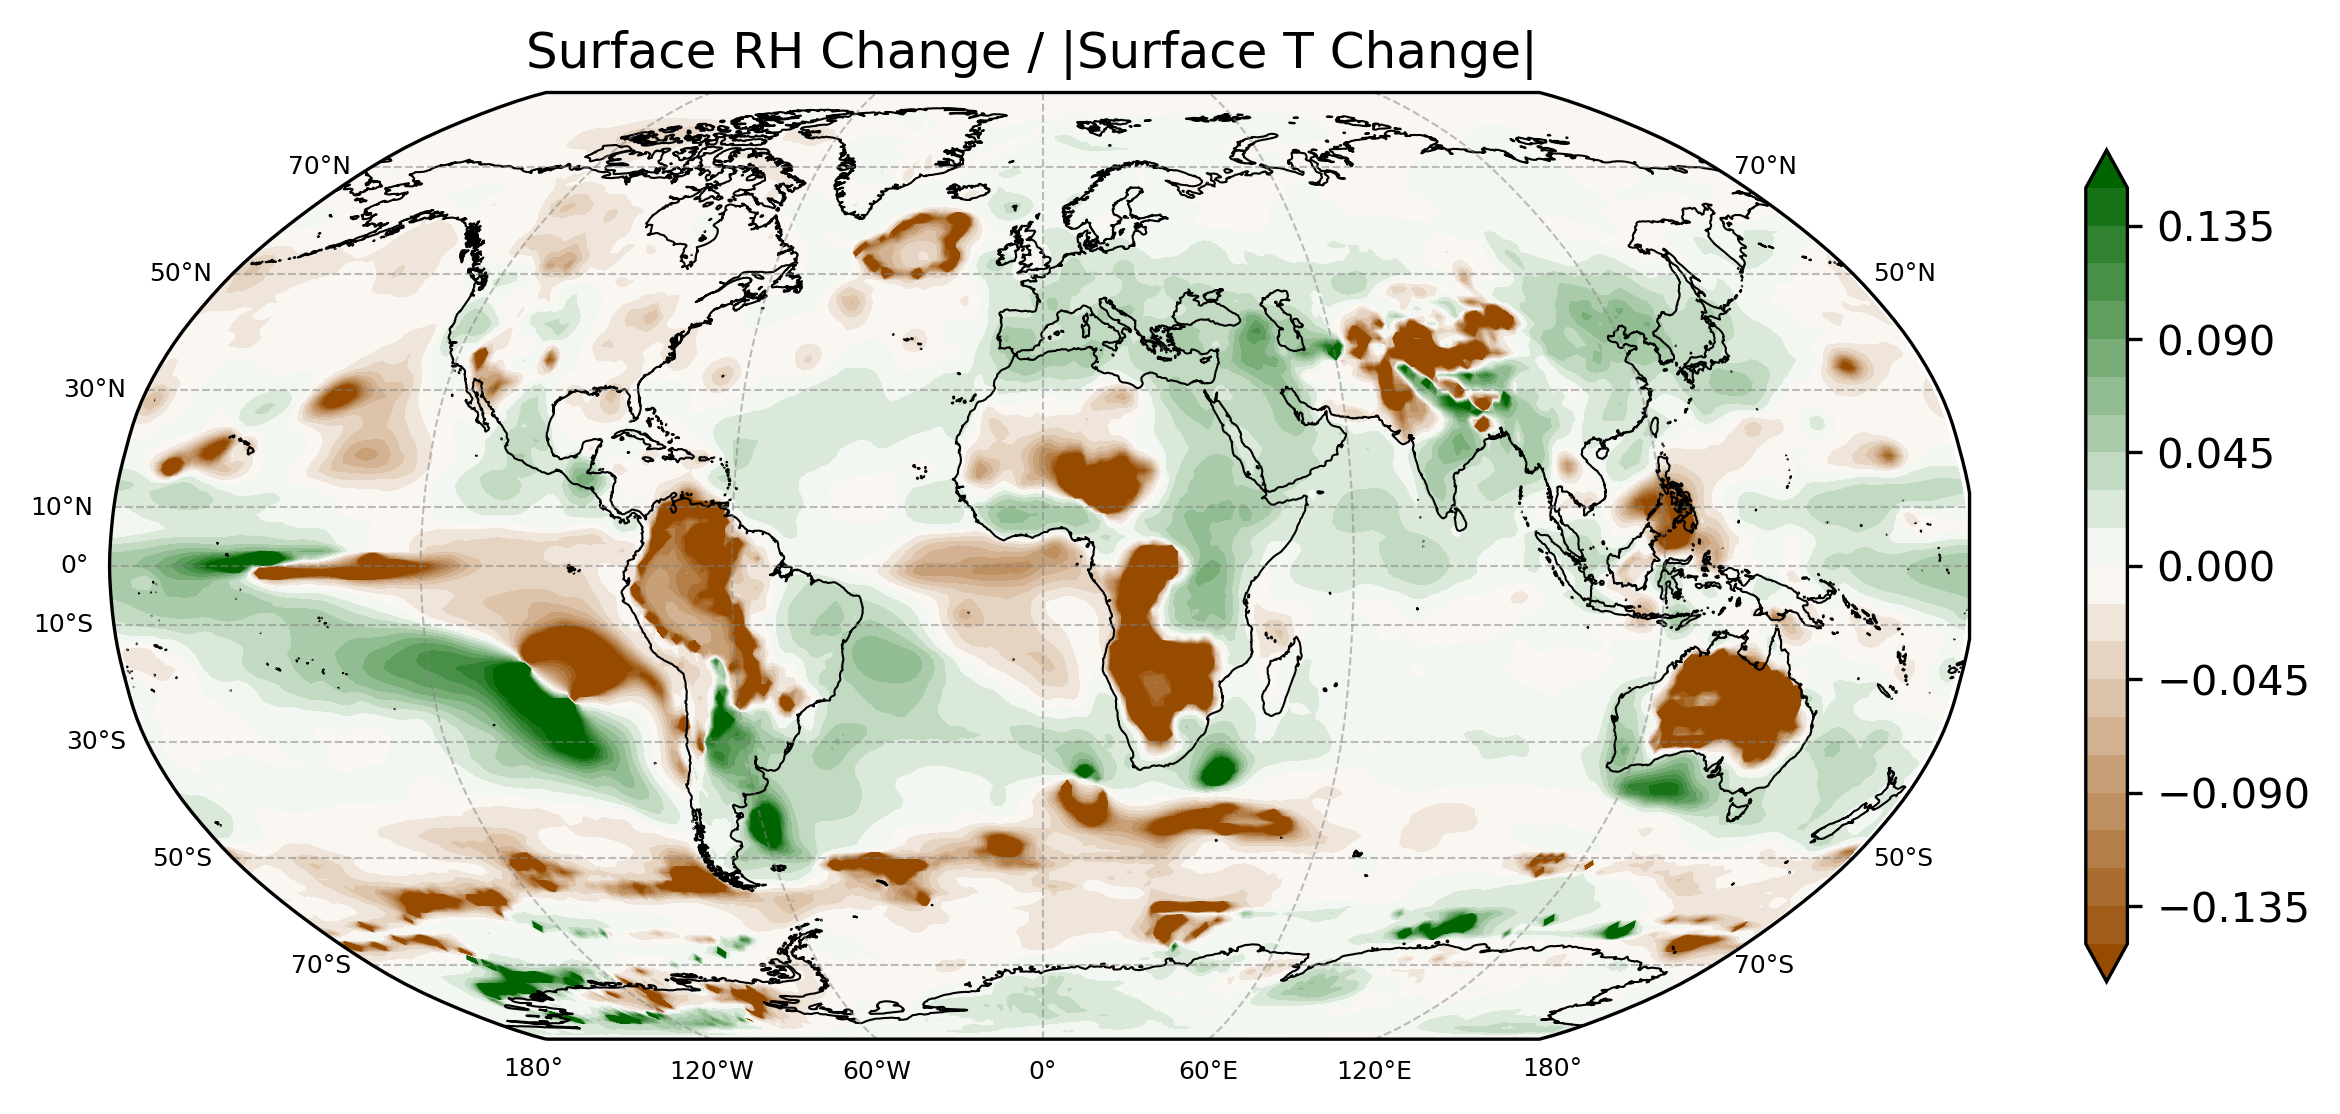

In [12]:
def norm(vmin,vmax,vcentner=0):
    global norm
    return mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcentner, vmax=vmax)


    
if RHCHANGEOVERTCHANGE_HORIZONTAL==True:
    
    #Calculate the changes in variables
    T1 = time_mean( DS.ds_surface.RH.sel(time=slice(t1_start,t1_end)) )
    T2 = time_mean( DS.ds_surface.RH.sel(time=slice(t2_start,t2_end)) )
    RH_diff=(T1-T2)
    
    T1 =K2Deg( time_mean( DS.ds_surface.T.sel(time=slice(t1_start,t1_end)) ))
    T2 =K2Deg( time_mean( DS.ds_surface.T.sel(time=slice(t2_start,t2_end)) ))
    T_diff=(T2-T1)
    
    # Plot Temp Change
    fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())
    
    T_diff.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',levels=30,norm=norm(vmin=-2,vmax=3.5),cmap='coolwarm',cbar_kwargs= cbar_kwargs)
    
    ax.set_title(' Surface T Change ')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'Tchange_horizontal.png',dpi=400)
    plt.show()
    
    
    # Plot RH Change 
    fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())
    
    (RH_diff/DT).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',levels=30,norm=norm(vmin=-0.0025,vmax=0.0025),cmap=cmap_RH_change,cbar_kwargs= cbar_kwargs)
    
    ax.set_title('Surface RH Change')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'RHchange_horizontal.png',dpi=400)
    plt.show()
    
    
    # Plot RH Change / T Change
    fig, ax, gl, cbar_kwargs = create_empty_2d_map(projection=ccrs.Robinson())
    
    (RH_diff/np.abs(T_diff)).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),x='lon',y='lat',levels=30,norm=norm(vmin=-0.15,vmax=0.15),cmap=cmap_RH_change,cbar_kwargs= cbar_kwargs)
    
    ax.set_title('Surface RH Change / |Surface T Change| ')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'RHoverTchange_horizontal.png',dpi=400)
    plt.show()
    


[########################################] | 100% Completed | 41.55 s
[########################################] | 100% Completed | 40.05 s


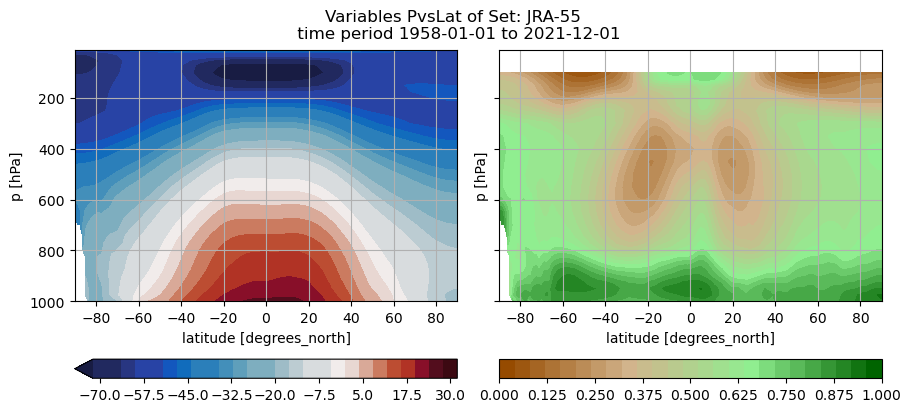

[########################################] | 100% Completed | 20.37 ss
[########################################] | 100% Completed | 3.01 sms


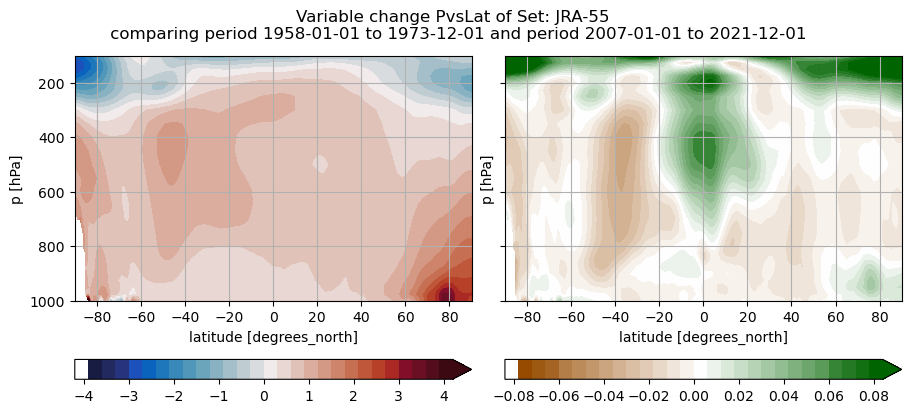

In [13]:
if RHCHANGEOVERTCHANGE_VERTICAL==True:
    zones=ZONES_Helene
    
    
    # In a colormap
    l1 = -90
    l2 = 90
    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4),sharey=True, constrained_layout=True)
    
   
    with ProgressBar():
        RH_diff = dask.compute(time_mean(lon_mean(get_timeframe(get_lat_zone(DS.ds.RH,l1,l2),t1_start,t2_end).sel(p=slice(1000,10)))) )[0]
    with ProgressBar():
        T_diff = dask.compute(time_mean(lon_mean( get_timeframe(get_lat_zone(DS.ds.T,l1,l2),t1_start,t2_end).sel(p=slice(1000,10)) )))[0]
    with ProgressBar():
        RH_norm = xr.Dataset({"RH":dask.compute(RH_diff/np.abs(T_diff.to_numpy()))[0]})
    
    rename_dict = {'RH': 'RH_normed_with_T'}
    RH_norm=RH_norm.rename(rename_dict)
    
    
    def norm(vmin,vmax,vcenter=0):
        return mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    def ticks(vmin,vmax):
        return np.linspace(vmin, vmax,9)
    
    vmin=-70
    vmax=30
    artlist=T_diff.plot.contourf(ax=ax1,yincrease=False, norm=norm(vmin, vmax),levels=30, x='lat',y='p',cmap=cmap_T,add_colorbar =False,)
    cbar=fig.colorbar(artlist, ax=ax1, orientation = 'horizontal',ticks=ticks(vmin,vmax))
    
    vmin=0
    vmax=1
    artlist=RH_diff.plot.contourf(ax=ax2, yincrease=False, norm=norm(vmin,vmax,vcenter=0.5), levels=30,y='p', cmap=cmap_RH,add_colorbar =False,)
    cbar=fig.colorbar(artlist, ax=ax2, orientation = 'horizontal',ticks=ticks(vmin,vmax))
    #artlist=RH_norm.RH_normed_with_T.plot.contourf(ax=ax3, yincrease=False, norm=norm(vmin=-0.1, vmax=0.1), levels=20,y='p', cmap=cmap_RH_change,add_colorbar =False,)
    #cbar=fig.colorbar(artlist, ax=ax3, orientation = 'horizontal')
    
    
    
    TOP_LIM4PLOT=10
    ax1.set_ylim(top=TOP_LIM4PLOT)
    #ax1.set_yscale('log')
    ax2.set_ylim(top=TOP_LIM4PLOT)
    #ax2.set_yscale('log')
    #ax3.set_ylim(top=TOP_LIM4PLOT)
    #ax3.set_yscale('log')
    
   
    ax1.grid()
    ax2.grid()
    
    fig.suptitle('Variables PvsLat of Set: '+SETNAME+' \n time period ' +t1_start+ ' to ' + t2_end )
    #plt.tight_layout()
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_variable.png',dpi=300)
    plt.show()

    
    
    # In a colormap
    l1 = -90
    l2 = 90
    
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9,4),sharey=True, constrained_layout=True)
    
   
    with ProgressBar():
        RH_diff = dask.compute(time_mean(lon_mean(get_timeframe(get_lat_zone(DS.ds.RH,l1,l2),t2_start,t2_end).sel(p=slice(1000,100)))) - time_mean(lon_mean(get_timeframe(get_lat_zone(DS.ds.RH,l1,l2),t1_start,t1_end).sel(p=slice(1000,100)))))[0]
    with ProgressBar():
        T_diff = dask.compute(time_mean(lon_mean( get_timeframe(get_lat_zone(DS.ds.T,l1,l2),t2_start,t2_end).sel(p=slice(1000,100)) )) - time_mean(lon_mean( get_timeframe(get_lat_zone(DS.ds.T,l1,l2),t1_start,t1_end).sel(p=slice(1000,100)) )))[0]
    with ProgressBar():
        RH_norm = xr.Dataset({"RH":dask.compute(RH_diff/np.abs(T_diff.to_numpy()))[0]})
    
    rename_dict = {'RH': 'RH_normed_with_T'}
    RH_norm=RH_norm.rename(rename_dict)
    
    
    def norm(vmin,vmax,vcenter=0):
        return mcolors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    def ticks(vmin,vmax):
        return np.linspace(vmin, vmax,9)
    
    vmin=-4
    vmax=4
    artlist=T_diff.plot.contourf(ax=ax1,yincrease=False, norm=norm(vmin, vmax),levels=30, x='lat',y='p',cmap=cmap_T,add_colorbar =False,)
    cbar=fig.colorbar(artlist, ax=ax1, orientation = 'horizontal',ticks=ticks(vmin,vmax))
    
    vmin=-0.08
    vmax=0.08
    artlist=RH_diff.plot.contourf(ax=ax2, yincrease=False, norm=norm(vmin,vmax), levels=30,y='p', cmap=cmap_RH_change,add_colorbar =False,)
    cbar=fig.colorbar(artlist, ax=ax2, orientation = 'horizontal',ticks=ticks(vmin,vmax))
    #artlist=RH_norm.RH_normed_with_T.plot.contourf(ax=ax3, yincrease=False, norm=norm(vmin=-0.1, vmax=0.1), levels=20,y='p', cmap=cmap_RH_change,add_colorbar =False,)
    #cbar=fig.colorbar(artlist, ax=ax3, orientation = 'horizontal')
    
    
    
    TOP_LIM4PLOT=100
    ax1.set_ylim(top=TOP_LIM4PLOT)
    #ax1.set_yscale('log')
    ax2.set_ylim(top=TOP_LIM4PLOT)
    #ax2.set_yscale('log')
    #ax3.set_ylim(top=TOP_LIM4PLOT)
    #ax3.set_yscale('log')
    
    ax1.grid()
    ax2.grid()
    
    fig.suptitle('Variable change PvsLat of Set: '+SETNAME+' \n comparing period ' +t1_start+ ' to ' + t1_end + ' and period '+ t2_start+ ' to ' + t2_end)
    #plt.tight_layout()
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_variable_change.png',dpi=300)
    plt.show()

    TOP_LIM4PLOT=10



[########################################] | 100% Completed | 11.60 ss
[########################################] | 100% Completed | 2.45 sms
[########################################] | 100% Completed | 2.33 sms
[########################################] | 100% Completed | 4.11 sms
[########################################] | 100% Completed | 2.90 sms


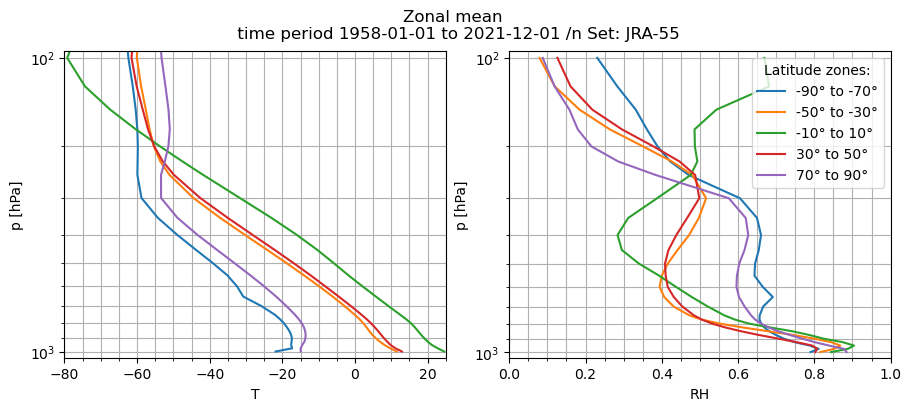

[########################################] | 100% Completed | 13.02 ss
[########################################] | 100% Completed | 22.91 s
[########################################] | 100% Completed | 22.78 s
[########################################] | 100% Completed | 22.40 s
[########################################] | 100% Completed | 21.89 s


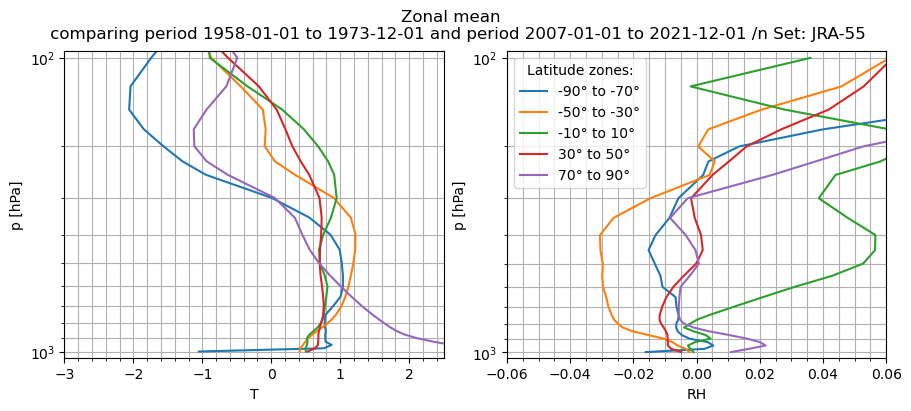

In [14]:
if TvsRHANALYSIS==True:
    #ZONES_Test =np.array([-90,-89]) # Zones between 1.,2. and 3.,4. and ...
    zones=ZONES_Helene
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4), constrained_layout=True)

    for i in range(0,int(0.5*len(zones))):
        l1 = zones[2*i]
        l2 = zones[2*i+1]
        
        with ProgressBar():
            Diff = dask.compute(DS.ds.sel(lat=slice(l1,l2),time=slice(t1_start,t1_end)).mean(('time','lat','lon')))[0]
        
        Diff.T.plot.line(ax=ax1,y='p',yincrease=False,)
        Diff.RH.plot.line(ax=ax2,y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'°')
        #get_vertical_levels(Diff,1001,100).plot.scatter(ax=ax3,x='RH',y='T',yincrease=True) #, linestyle='-', marker=''
    
    TOP_LIM4PLOT=95
    ax1.set_ylim(top=TOP_LIM4PLOT)
    ax2.set_ylim(top=TOP_LIM4PLOT)
    ax1.set_xlim((-80,25))
    ax2.set_xlim((0,1))
    #ax1.set_xlim(left=-3)
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    #ax3.set_yscale('log')
    fig.suptitle('Zonal mean \n time period ' +t1_start+ ' to ' + t2_end+' /n Set: '+ SETNAME)
    ax2.legend(title = 'Latitude zones:')
    #plt.tight_layout()
    ax1.grid()
    ax1.grid(which = "minor")
    ax1.minorticks_on()
    ax2.grid()
    ax2.grid(which = "minor")
    ax2.minorticks_on()
    
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_variable_profiles_.png',dpi=400)
    
    plt.show()
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4), constrained_layout=True)

    for i in range(0,int(0.5*len(zones))):
        l1 = zones[2*i]
        l2 = zones[2*i+1]
        
        with ProgressBar():
            Diff = dask.compute(DS.ds.sel(lat=slice(l1,l2),time=slice(t2_start,t2_end)).mean(('time','lat','lon'))-DS.ds.sel(lat=slice(l1,l2),time=slice(t1_start,t1_end)).mean(('time','lat','lon')))[0]
        
        Diff.T.plot.line(ax=ax1,y='p',yincrease=False,)
        Diff.RH.plot.line(ax=ax2,y='p',yincrease=False, label = str(l1)+'° to '+str(l2)+'°')
        #get_vertical_levels(Diff,1001,100).plot.scatter(ax=ax3,x='RH',y='T',yincrease=True) #, linestyle='-', marker=''
    
    TOP_LIM4PLOT=95
    ax1.set_ylim(top=TOP_LIM4PLOT)
    ax2.set_ylim(top=TOP_LIM4PLOT)
    ax1.set_xlim((-2.5,2.5))
    ax2.set_xlim((-0.06,0.06))
    ax1.set_xlim(left=-3)
    ax1.set_yscale('log')
    ax2.set_yscale('log')
    #ax3.set_yscale('log')
    fig.suptitle('Zonal mean  \n comparing period ' +t1_start+ ' to ' + t1_end + ' and period '+ t2_start+ ' to ' + t2_end+' /n Set: '+ SETNAME)
    ax2.legend(title = 'Latitude zones:')
    #plt.tight_layout()
    ax1.grid()
    ax1.grid(which = "minor")
    ax1.minorticks_on()
    ax2.grid()
    ax2.grid(which = "minor")
    ax2.minorticks_on()
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_variable_change_profiles.png',dpi=400)
    
    plt.show()


In [15]:
if TvsRHANALYSIS==True:
    with ProgressBar():
            Diff = dask.compute(time_mean(get_timeframe(DS.ds,t2_start,t2_end))-time_mean(get_timeframe(DS.ds,t1_start,t1_end)))[0]
    

[########################################] | 100% Completed | 22.90 s


[950, 950]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/tmp/ipykernel_2119333/1166967612.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  im = ax.contourf(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],norm=mcolors.LogNorm(), cmap='viridis',  vmin = 1, vmax= 10000, levels = 20)


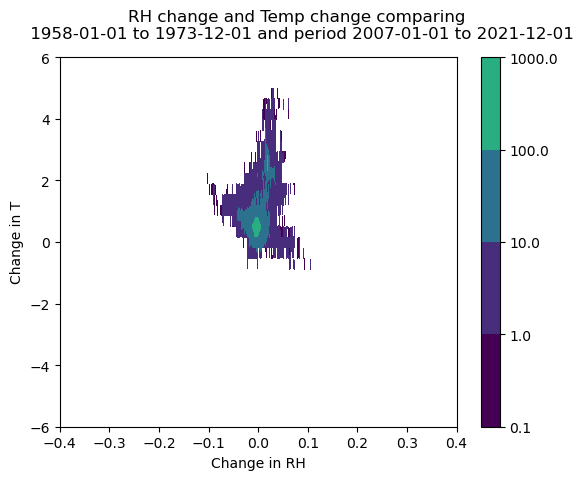

In [16]:


if TvsRHANALYSIS==True:
    level=[[950,950]]
    
    for l in level:
        print(l)
        fig, ax= plt.subplots(1,1)

        # Create a 2D histogram
        isnanmask = ~np.isnan(np.asarray(get_vertical_levels(Diff,l[0],l[1])['RH']))
        heatmap, xedges, yedges = np.histogram2d(
            np.asarray(get_vertical_levels(Diff,l[0],l[1])['RH'])[isnanmask].reshape(-1), 
            np.asarray(get_vertical_levels(Diff,l[0],l[1])['T'])[isnanmask].reshape(-1), 
            bins=(int(100*6/0.4),100))

        # Plot the heatmap
        #im = ax.imshow(heatmap.T, origin='lower',  aspect='auto',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis', norm=mcolors.LogNorm())
        print(heatmap)
        im = ax.contourf(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],norm=mcolors.LogNorm(), cmap='viridis',  vmin = 1, vmax= 10000, levels = 20)
        
        # Add a colorbar
        cbar=plt.colorbar(im)

        #cbar.set_ylabel("#")  ###################################################  Wie geht das?

        ax.set_xlabel('Change in RH')
        ax.set_ylabel('Change in T')
        ax.set_ylim(-6, 6)
        ax.set_xlim(-0.4, 0.4)

        ax.set_title('')

        fig.suptitle('RH change and Temp change comparing \n ' +t1_start+ ' to ' + t1_end + ' and period '+ t2_start+ ' to ' + t2_end)
        plt.savefig('DRHvsDT-Hist-p='+str(l[0])+'-'+str(l[1])+'.pdf')
        plt.show()  

In [17]:
if TONYAXISPLOT == True:
    
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()

    for i in range(0,int(0.5*len(zones))):
        l1 = zones[2*i]
        l2 = zones[2*i+1]
        print(l1,l2)
        
        profile = DS.ds.sel(lat=slice(l1,l2), time=slice(t1,t2),p=slice(1000,200)).weighted(np.cos(np.deg2rad(DS.ds.lat))).mean(("time", "lat", "lon"))
        
        profile.plot.scatter(y='T',x='RH',yincrease=False, label = str(l1)+'° to '+str(l2)+'°',marker='x')
    
    
    #ax.set_yscale('log')
    ax.set_title('Vertical profile of RH as a function of T')
    ax.legend(title = 'Latitude zones:')
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_T_zones.png',dpi=400)
    plt.show()



In [18]:
from xhistogram.xarray import histogram


if TONYAXISPLOT2 == True:
    
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()
    
    latbins = np.arange(-90,90,2)
    tbins = np.arange(-50,35 , 3)
    #print(rhbins,tbins)
    ds = DS.ds.sel(time=slice(t1,t2),p=slice(1000,100)).where(TOPO.land_mask_reindexed==False).mean(("lon"))
    
    hist = histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins])
    RH_hist= histogram(ds.lat.where(~np.isnan(ds.RH)),ds.T.where(~np.isnan(ds.RH)),  bins=[latbins, tbins], weights = ds.RH.where(~np.isnan(ds.RH)))
    
    (RH_hist/hist).T.plot(ax=ax,levels=20, yincrease=False)
    
    
    
    #ax.set_yscale('log')
    ax.set_title('Vertical profile of RH as a function of T')
    
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_T.png',dpi=400)
    plt.show()

In [19]:
if TONYAXISPLOTCOMPARE == True:
   
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()
    
    latbins = np.arange(-90,90,2)
    tbins = np.arange(-50,35 , 3)
    #print(rhbins,tbins)
    ds2 = DS.ds.sel(time=slice(t2_start,t2_end),p=slice(1000,100)).mean(("time","lon")) #.where(TOPO.land_mask_reindexed==False)
    ds1 = DS.ds.sel(time=slice(t1_start,t1_end),p=slice(1000,100)).mean(("time","lon"))
    with ProgressBar():
        ds = dask.compute(ds2 - ds1)[0]
    
    
    hist = histogram(ds2.lat,ds2.T,  bins=[latbins, tbins])
    RH_hist= histogram(ds2.lat,ds2.T,  bins=[latbins, tbins], weights = ds.RH)
    
    (RH_hist/hist).T.plot(ax=ax,levels=20, yincrease=False,cmap=cmap_RH_change)
    
    
    
    #ax.set_yscale('log')
    ax.set_title('Vertical profile of RH as a function of T')
    
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_T.png',dpi=400)
    plt.show()

In [20]:
if TONYAXISPLOTCOMPARE == True:
   
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()
    
    latbins = np.arange(-90,90,2)
    tbins = np.arange(-50,35 , 3)
    #print(rhbins,tbins)
    ds2 = DS.ds.sel(time=slice(t2_start,t2_end),p=slice(1000,100)).where(TOPO.land_mask_reindexed==False).mean(("time")) #.where(TOPO.land_mask_reindexed==False)
    ds1 = DS.ds.sel(time=slice(t1_start,t1_end),p=slice(1000,100)).where(TOPO.land_mask_reindexed==False).mean(("time"))
    with ProgressBar():
        ds = dask.compute(ds2 - ds1)[0]
    
    
    hist = histogram(ds2.lat,ds2.T,  bins=[latbins, tbins])
    RH_hist= histogram(ds2.lat,ds2.T,  bins=[latbins, tbins], weights = ds.RH)
    
    (RH_hist/hist).T.plot(ax=ax,levels=20, yincrease=False,cmap=cmap_RH_change, vmin=-0.05, vmax=0.05)
    
    
    
    #ax.set_yscale('log')
    ax.set_title('Vertical profile of RH as a function of T')
    
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_T.png',dpi=400)
    plt.show()

In [21]:
if TONYAXISPLOTCOMPARE == True:
   
    zones=ZONES_Helene
    t1=t1_start
    t2=t1_end
    
    
    fig, ax = plt.subplots()
    
    latbins = np.arange(-90,90,2)
    tbins = np.arange(-50,35 , 3)
    #print(rhbins,tbins)
    ds2 = DS.ds.sel(time=slice(t2_start,t2_end),p=slice(1000,100)).where(TOPO.land_mask_reindexed==True).mean(("time")) #.where(TOPO.land_mask_reindexed==False)
    ds1 = DS.ds.sel(time=slice(t1_start,t1_end),p=slice(1000,100)).where(TOPO.land_mask_reindexed==True).mean(("time"))
    with ProgressBar():
        ds = dask.compute(ds2 - ds1)[0]
    
    
    hist = histogram(ds2.lat,ds2.T,  bins=[latbins, tbins])
    RH_hist= histogram(ds2.lat,ds2.T,  bins=[latbins, tbins], weights = ds.RH)
    
    (RH_hist/hist).T.plot(ax=ax,levels=20, yincrease=False,cmap=cmap_RH_change, vmin=-0.05, vmax=0.05)
    
    
    
    #ax.set_yscale('log')
    ax.set_title('Vertical profile of RH as a function of T')
    
    plt.savefig(RESLOC+RESLOC_SPECIFIC+'vertical_RH_profiles_T.png',dpi=400)
    plt.show()